<a href="https://colab.research.google.com/github/anishkodadala/Projects-Resume-/blob/main/cardiovascular_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Import Python Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
import seaborn as sns

## **Import SVM Libraries From Scikit-Learn**

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.feature_selection import SelectFromModel
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import AdaBoostClassifier
from sklearn.calibration import CalibratedClassifierCV

## **Import Decision Tree Libraries**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn import metrics







## **Performance Boosting Libraries**

In [ ]:
import xgboost as xgb
import lightgbm as lgb
import warnings
warnings.filterwarnings('ignore')

## **Import k-Nearest Neighbors (KNN) Libraries**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import classification_report, accuracy_score,  roc_curve, auc, precision_recall_curve

## **Import Logistic Regression Libraries**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

## **Import Random Forest Libraries**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc, precision_recall_curve


## **Data Processing Libraries**

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

## **Data Analysis**---(analyzing, cleaning, exploring, and manipulating)
     1.Load the data from our Data file
---




In [ ]:
# Load the dataset

data = pd.read_csv("cardio_train.csv", delimiter=';')
# Drop any rows with missing values
data.dropna(inplace=True)

## **Display the first few rows of the dataset**

In [ ]:
print(data.head())

   id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0  


## **Check for total data information and data types**

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB
None


##  **Summary of statistics**

In [ ]:
# Summary statistics
print(data.describe())

                 id           age        gender        height        weight  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean   49972.419900  19468.865814      1.349571    164.359229     74.205690   
std    28851.302323   2467.251667      0.476838      8.210126     14.395757   
min        0.000000  10798.000000      1.000000     55.000000     10.000000   
25%    25006.750000  17664.000000      1.000000    159.000000     65.000000   
50%    50001.500000  19703.000000      1.000000    165.000000     72.000000   
75%    74889.250000  21327.000000      2.000000    170.000000     82.000000   
max    99999.000000  23713.000000      2.000000    250.000000    200.000000   

              ap_hi         ap_lo   cholesterol          gluc         smoke  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean     128.817286     96.630414      1.366871      1.226457      0.088129   
std      154.011419    188.472530      0.680250    

# **Data Cleaning and checking missing values**

In [ ]:
# Data Cleaning
# Handle missing values (replace with median for numerical columns)
imputer = SimpleImputer(strategy='median')
data[['height', 'weight', 'ap_hi', 'ap_lo']] = imputer.fit_transform(data[['height', 'weight', 'ap_hi', 'ap_lo']])

# **Removing outliers for better performance**

In [ ]:
# Remove outliers (e.g., unrealistic values of blood pressure)
data = data[(data['ap_hi'] > 0) & (data['ap_hi'] < 250) & (data['ap_lo'] > 0) & (data['ap_lo'] < 200)]

# **Plotting Graphs for Removal of outliers**

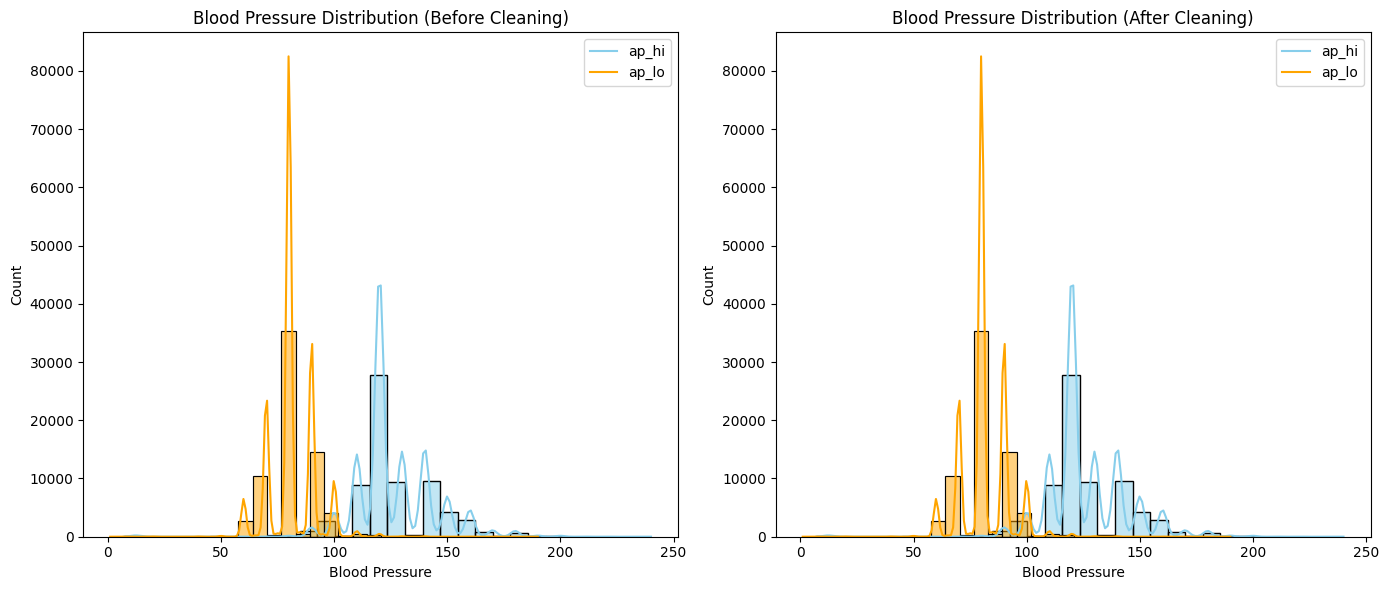

In [ ]:
# Plotting the histograms
plt.figure(figsize=(14, 6))

# Histogram before cleaning outliers
plt.subplot(1, 2, 1)
sns.histplot(data['ap_hi'], bins=30, kde=True, color='skyblue')
sns.histplot(data['ap_lo'], bins=30, kde=True, color='orange')
plt.title('Blood Pressure Distribution (Before Cleaning)')
plt.xlabel('Blood Pressure')
plt.legend(['ap_hi', 'ap_lo'])

# Histogram after cleaning outliers
plt.subplot(1, 2, 2)
sns.histplot(data['ap_hi'], bins=30, kde=True, color='skyblue')
sns.histplot(data['ap_lo'], bins=30, kde=True, color='orange')
plt.title('Blood Pressure Distribution (After Cleaning)')
plt.xlabel('Blood Pressure')
plt.legend(['ap_hi', 'ap_lo'])

plt.tight_layout()
plt.show()

# **Convert age from days to years for better readability**

In [ ]:
# Convert 'age' from days to years for better readability
data['age_years'] = data['age'] // 365.25

# **Calculate BMI**

In [ ]:
# Calculate BMI (Body Mass Index)
data['bmi'] = data['weight'] / ((data['height'] / 100) ** 2)

# **Plotting Graphs for age_years and bmi**

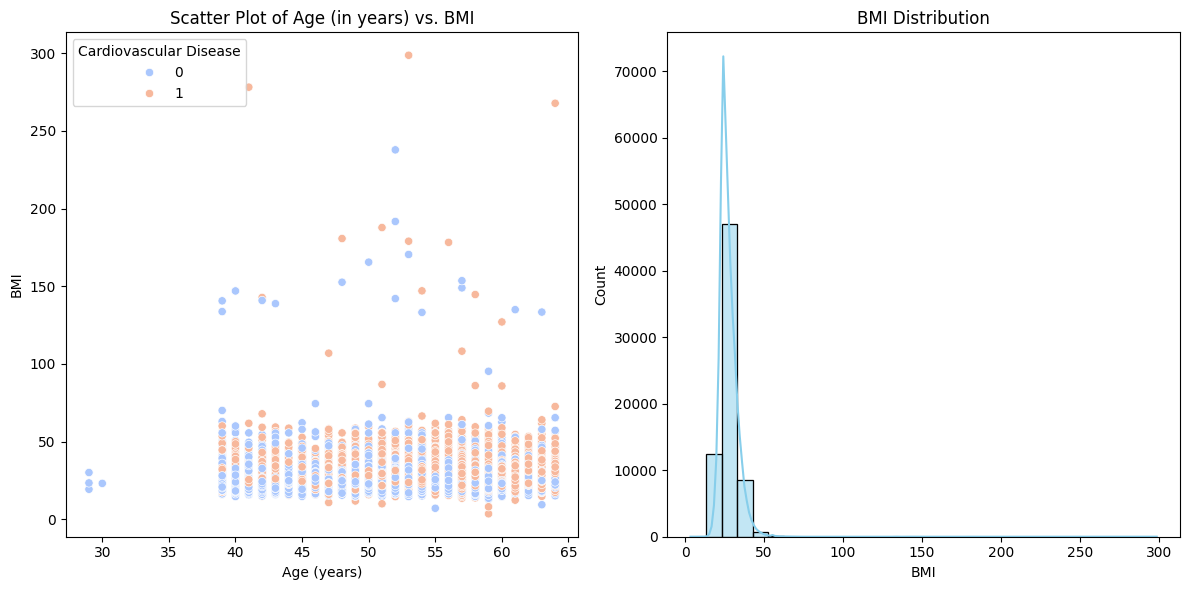

In [ ]:
plt.figure(figsize=(12, 6))

# Scatter plot of age_years and bmi
plt.subplot(1, 2, 1)
sns.scatterplot(x='age_years', y='bmi', data=data, hue='cardio', palette='coolwarm')
plt.title('Scatter Plot of Age (in years) vs. BMI')
plt.xlabel('Age (years)')
plt.ylabel('BMI')
plt.legend(title='Cardiovascular Disease')

# Histogram of BMI
plt.subplot(1, 2, 2)
sns.histplot(data['bmi'], bins=30, kde=True, color='skyblue')
plt.title('BMI Distribution')
plt.xlabel('BMI')

plt.tight_layout()
plt.show()

# **Encode the Categorical Values**

In [ ]:
# Encode categorical variables (gender, cholesterol)
ct = ColumnTransformer(transformers=[
    ('encoder', OneHotEncoder(), ['gender', 'cholesterol'])
], remainder='passthrough')

# **Graph Plotting for Encode Categorical Variables**

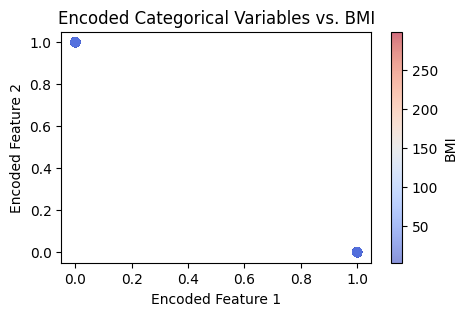

In [ ]:
# Encode categorical variables ('gender', 'cholesterol') using OneHotEncoder
ct = ColumnTransformer(transformers=[
    ('encoder', OneHotEncoder(), ['gender', 'cholesterol'])
], remainder='passthrough')

# Transform the dataset with the encoded features
X_encoded = ct.fit_transform(data[['gender', 'cholesterol', 'age_years', 'height', 'weight', 'ap_hi', 'ap_lo']])

# Visualize the transformed dataset (example plot)
plt.figure(figsize=(5, 3))
# Assuming X_encoded is a NumPy array after transformation
# Plotting the first two columns (encoded categorical variables) against BMI
plt.scatter(X_encoded[:, 0], X_encoded[:, 1], c=data['bmi'], cmap='coolwarm', alpha=0.6)
plt.colorbar(label='BMI')
plt.title('Encoded Categorical Variables vs. BMI')
plt.xlabel('Encoded Feature 1')
plt.ylabel('Encoded Feature 2')
plt.show()

# **Assigning Target variables**

In [ ]:
# Prepare data for machine learning
X = data.drop(columns=['id', 'age', 'gluc', 'smoke', 'alco', 'active', 'cardio'])
y = data['cardio']

# **Graph Plotting for relationships between variables**

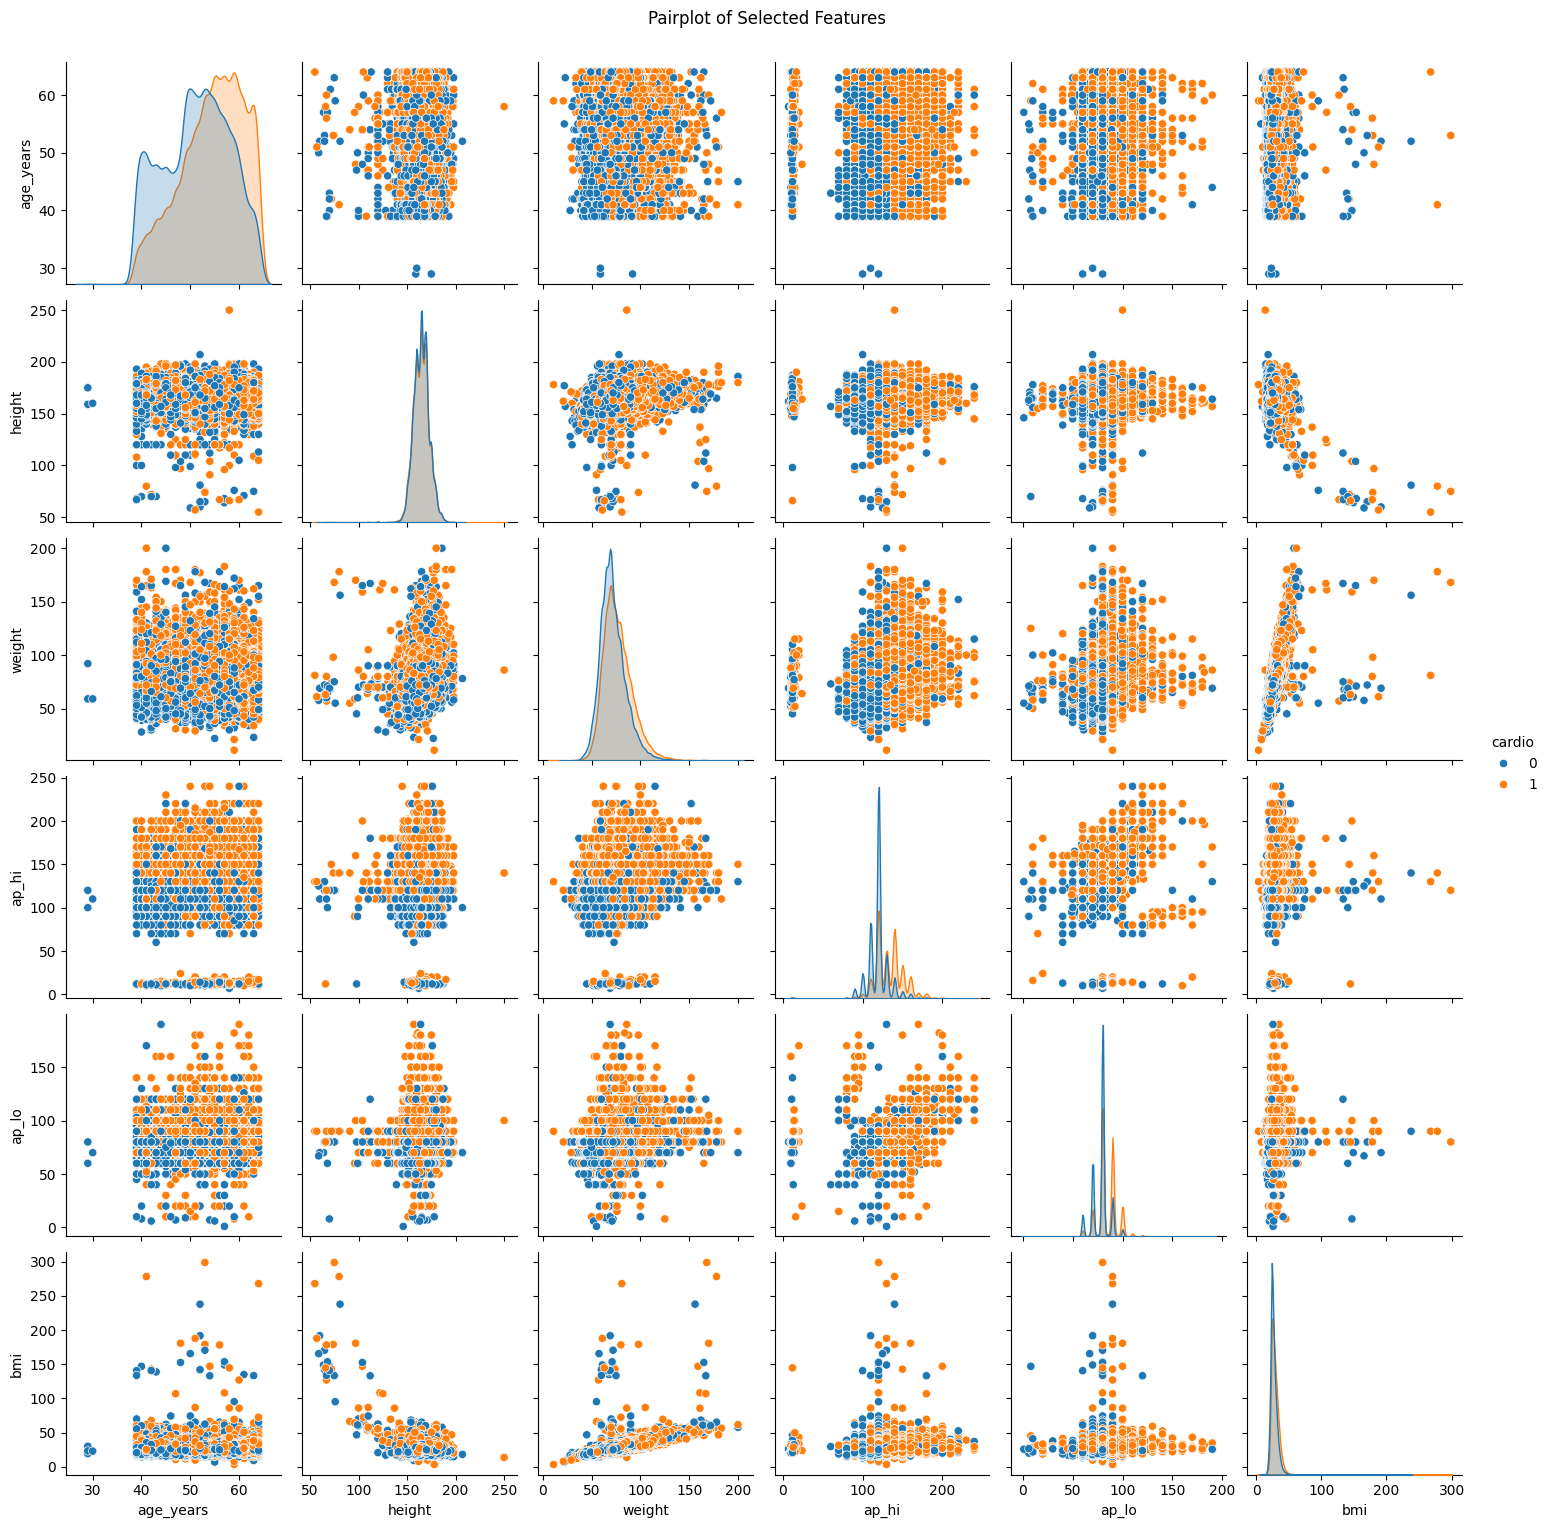

In [ ]:
# Data Exploration
# Pairplot for visualizing relationships between variables
sns.pairplot(data[['age_years', 'height', 'weight', 'ap_hi', 'ap_lo', 'bmi', 'cardio']], hue='cardio', diag_kind='kde')
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

# **Boxplot Visualizing**

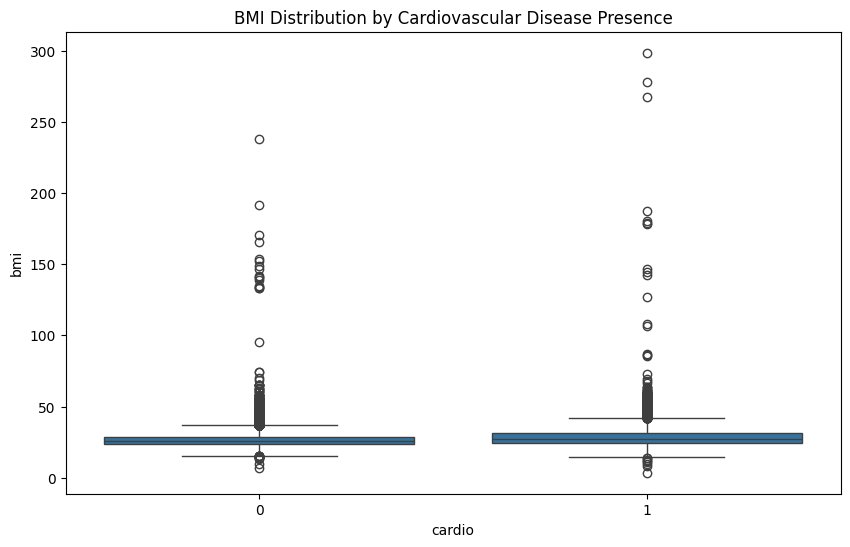

In [ ]:
# Advanced Visualization
# Boxplot for visualizing distributions and outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x='cardio', y='bmi', data=data)
plt.title('BMI Distribution by Cardiovascular Disease Presence')
plt.show()

# **Correlations of Each Feature in Dataset**

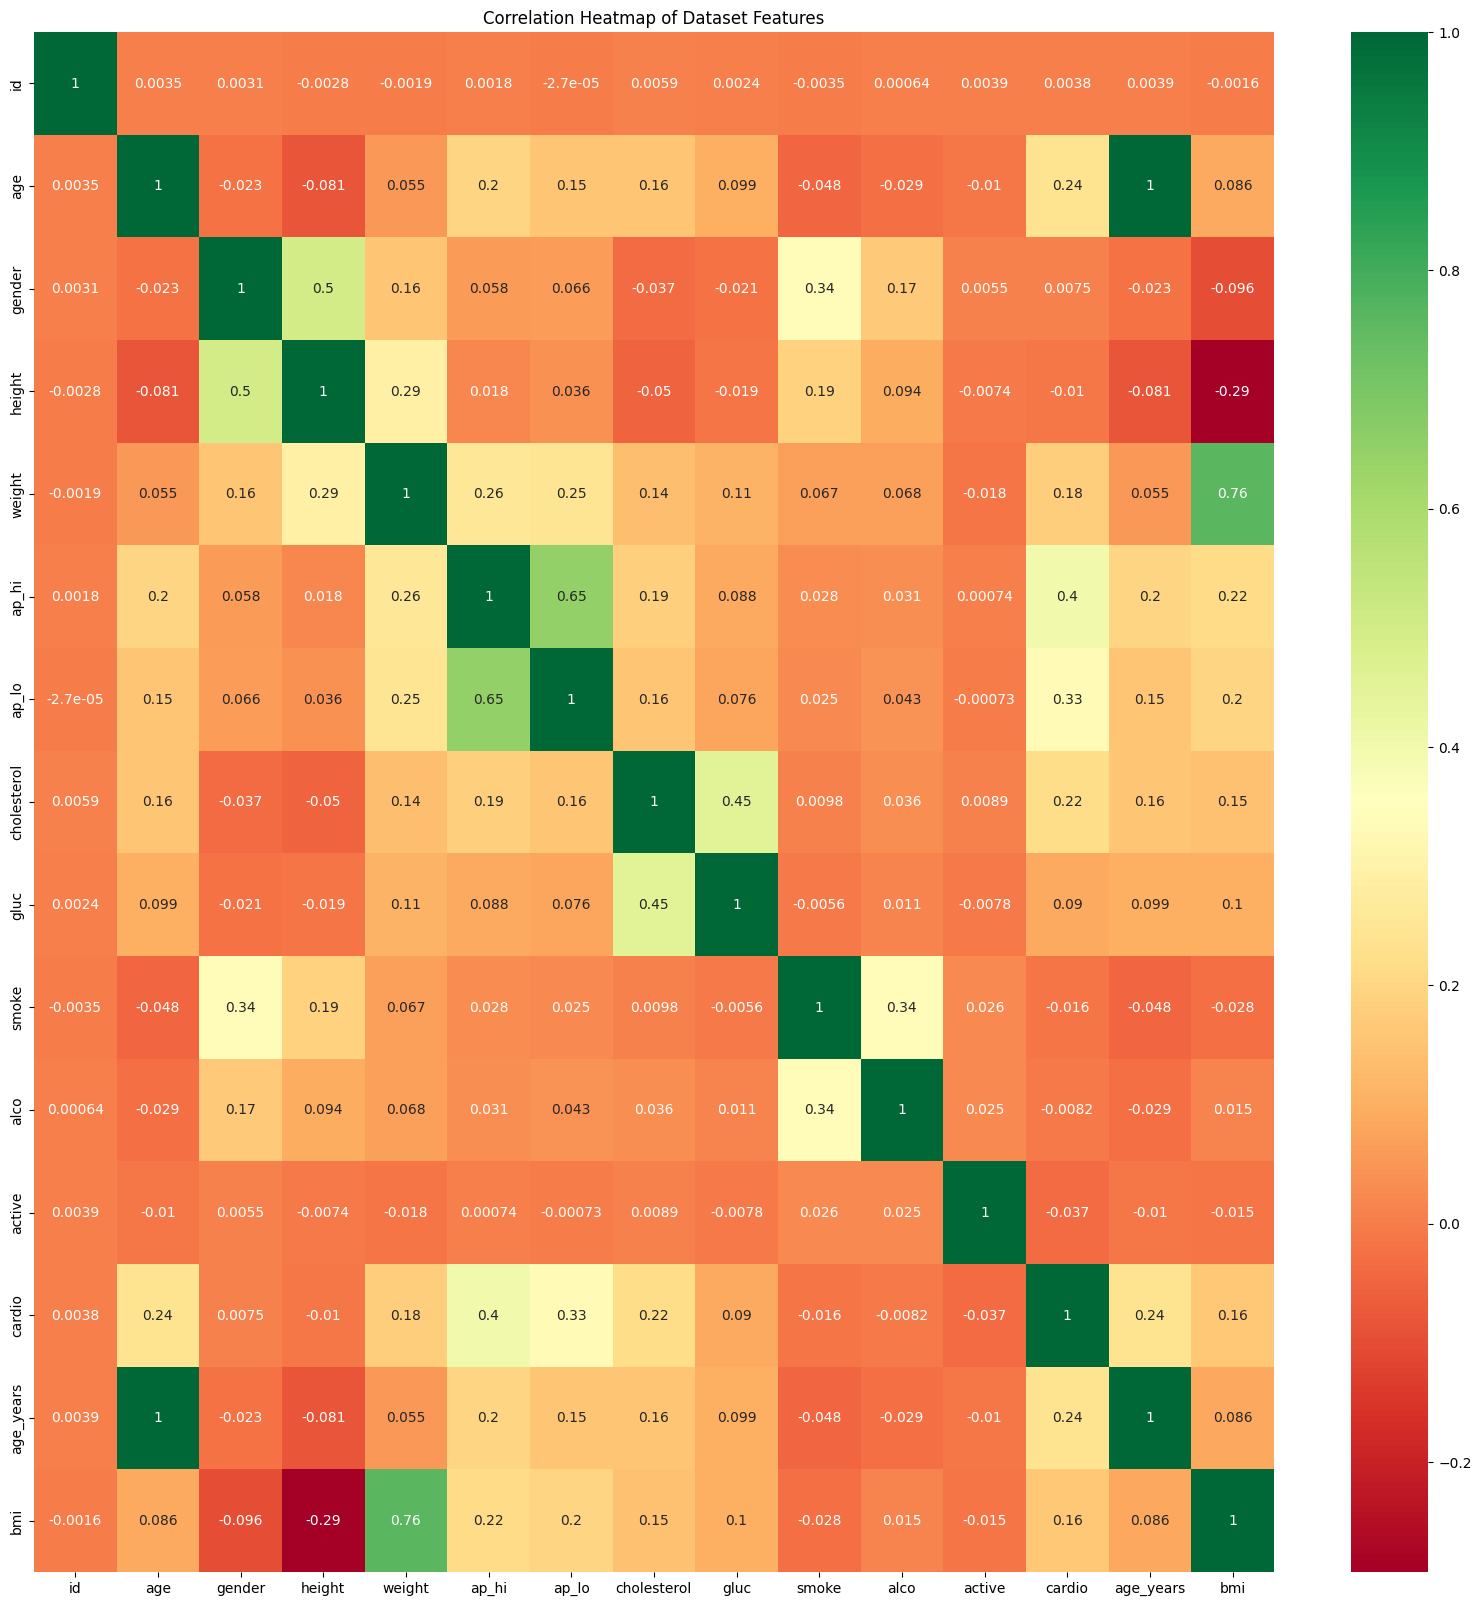

In [ ]:
# Get correlations of each feature in dataset
corrmat = data.corr()
top_corr_features = corrmat.index

# Plot heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(data[top_corr_features].corr(), annot=True, cmap="RdYlGn")
plt.title('Correlation Heatmap of Dataset Features')
plt.show()

# Histograms of Numerical Features

<Figure size 5000x5000 with 0 Axes>

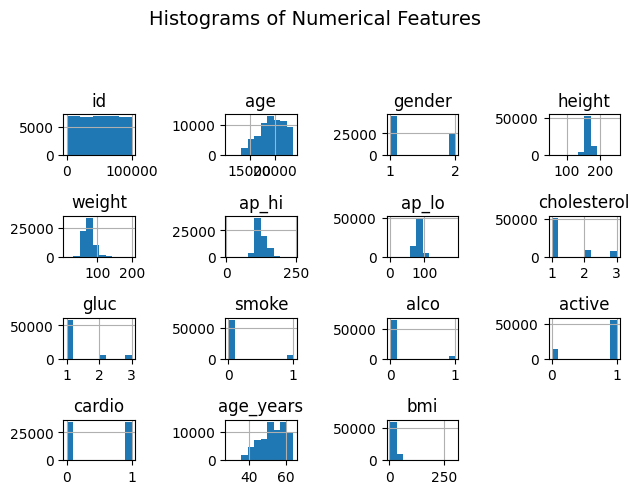

In [ ]:
# Set a larger figure size
plt.figure(figsize=(50,50))

# Plot histograms for numerical features
data.hist()
plt.suptitle('Histograms of Numerical Features', x=0.5, y=1.02, fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit suptitle properly

plt.show()

# **Plotting for target (cardio) column**

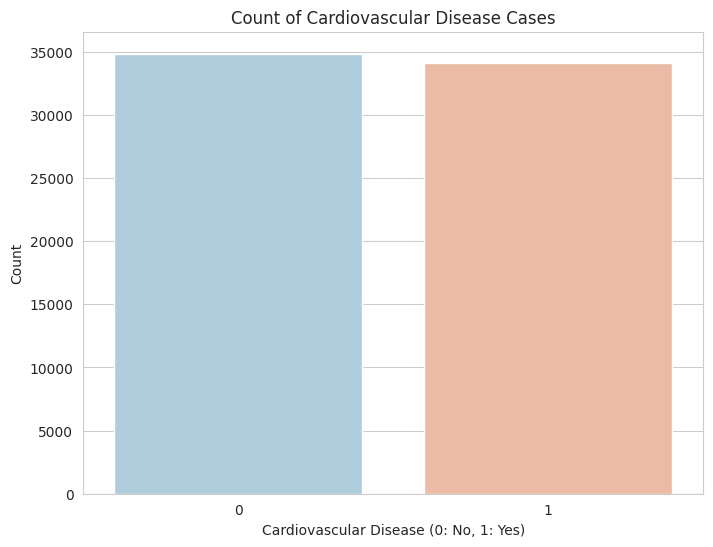

In [ ]:
# Set the style of seaborn plots (optional)
sns.set_style('whitegrid')

# Plot a count plot for the 'target' (cardio) column
plt.figure(figsize=(8, 6))
sns.countplot(x='cardio', data=data, palette='RdBu_r')
plt.title('Count of Cardiovascular Disease Cases')
plt.xlabel('Cardiovascular Disease (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()

# **Split data into train/test sets**

In [ ]:
# Split data into train/test sets (stratified for imbalanced classes)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# **Standardize features**

In [ ]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **Feature selection using SelectKBest**

In [ ]:
# Feature selection using SelectKBest
selector = SelectKBest(f_classif, k=5)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# **Selecting The Target Values**

In [ ]:
# Get selected feature indices and names
selected_indices = selector.get_support(indices=True)
selected_features = X.columns[selected_indices].tolist()

print(f"\nSelected Features: {selected_features}")


Selected Features: ['weight', 'ap_hi', 'ap_lo', 'cholesterol', 'age_years']


## **Decision Tree Analysis for Evaluation of model**

In [ ]:
# Data Preprocessing
# Separate features (X) and target variable (y)
X = data.drop(columns=['id', 'cardio'])
y = data['cardio']

In [ ]:
# Encode categorical variables (gender, cholesterol)
ct = ColumnTransformer(transformers=[
    ('encoder', OneHotEncoder(), ['gender', 'cholesterol'])
], remainder='passthrough')

In [ ]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **Complete Evaluation of decision Tree**

In [ ]:
# Build and train the Decision Tree Classifier model
model = Pipeline([
    ('preprocessor', ct),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder', OneHotEncoder(),
                                                  ['gender', 'cholesterol'])])),
                ('classifier', DecisionTreeClassifier(random_state=42))])

In [ ]:
# Make predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

In [ ]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))
print(classification_report(y_test, dt_pred))

Decision Tree Accuracy: 0.6299920272523012
              precision    recall  f1-score   support

           0       0.63      0.63      0.63      6925
           1       0.63      0.63      0.63      6872

    accuracy                           0.63     13797
   macro avg       0.63      0.63      0.63     13797
weighted avg       0.63      0.63      0.63     13797



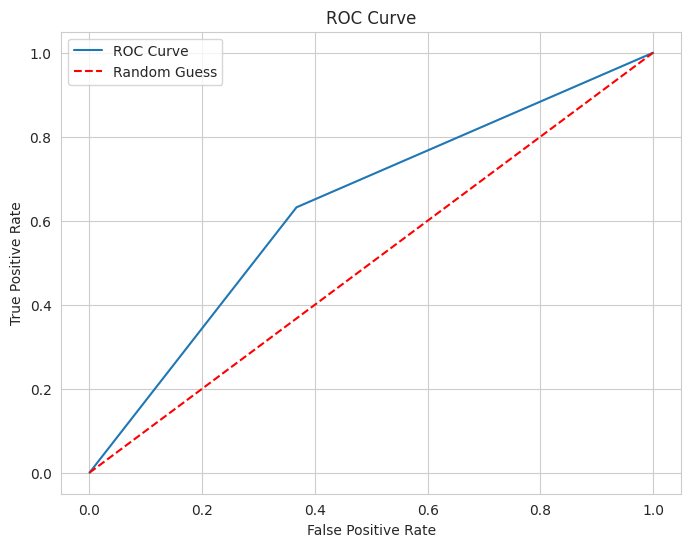

In [ ]:
# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [ ]:
# Calculate AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"AUC Score: {auc_score:.4f}")

AUC Score: 0.6323


Confusion Matrix, without normalization


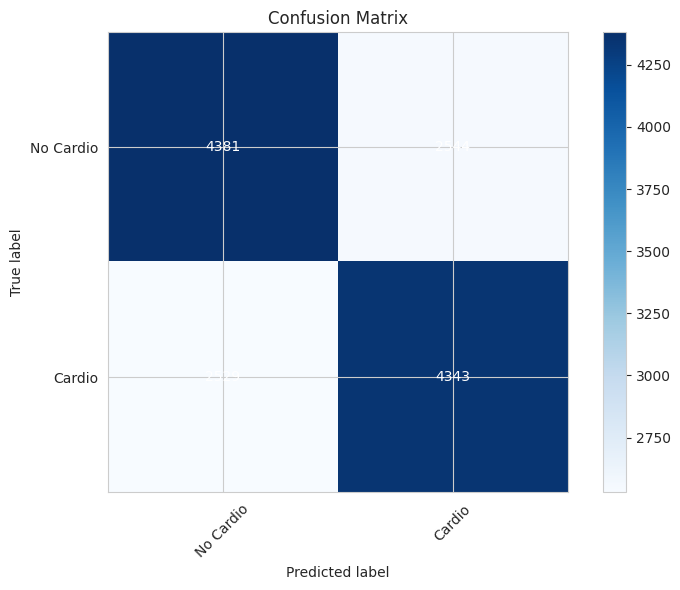

In [ ]:
def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title=None, cmap=plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Normalized Confusion Matrix'
        else:
            title = 'Confusion Matrix'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Normalize confusion matrix
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print('Confusion Matrix, without normalization')

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt),
                     ha="center", va="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()
plot_confusion_matrix(y_test, y_pred, classes=['No Cardio', 'Cardio'], normalize=False, title='Confusion Matrix')


In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.63


In [ ]:
# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")


Precision: 0.6306
Recall: 0.6320
F1-score: 0.6313


In [ ]:
# Classification Report
class_names = ['No Cardio', 'Cardio']
report = classification_report(y_test, y_pred, target_names=class_names)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

   No Cardio       0.63      0.63      0.63      6925
      Cardio       0.63      0.63      0.63      6872

    accuracy                           0.63     13797
   macro avg       0.63      0.63      0.63     13797
weighted avg       0.63      0.63      0.63     13797



In [ ]:
import xgboost as xgb

# Create DMatrix objects for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Specify parameters for XGBoost
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'max_depth': 3
}

# Train XGBoost model
num_rounds = 100
model = xgb.train(params, dtrain, num_rounds)

# Predict and evaluate
y_pred_proba = model.predict(dtest)
y_pred = (y_pred_proba > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.74


## **KNN Analysis**

In [ ]:
# Preprocessing
X = data.drop(columns=['id', 'cardio'])
y = data['cardio']

In [ ]:
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Feature scaling (important for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Initialize KNN classifier
knn = KNeighborsClassifier()

In [ ]:
# Define hyperparameters to tune
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weighting strategy
    'metric': ['euclidean', 'manhattan']  # Distance metric
}

In [ ]:
# Grid search to find the best hyperparameters
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
# Get the best model
best_knn = grid_search.best_estimator_

# Evaluate the best model on test data
y_pred = best_knn.predict(X_test_scaled)

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.71


# **Complete Evaluation of KNN**

In [ ]:
# Display classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.73      0.72      6925
           1       0.72      0.68      0.70      6872

    accuracy                           0.71     13797
   macro avg       0.71      0.71      0.71     13797
weighted avg       0.71      0.71      0.71     13797



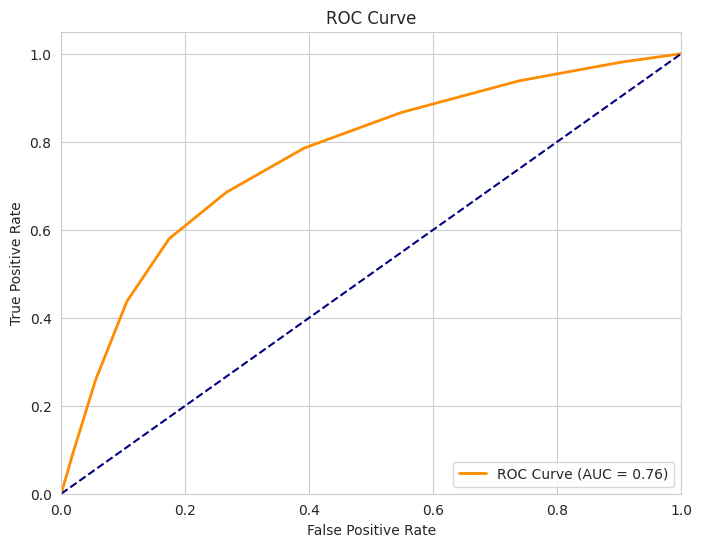

In [ ]:
# Plot ROC curve
y_pred_proba = best_knn.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

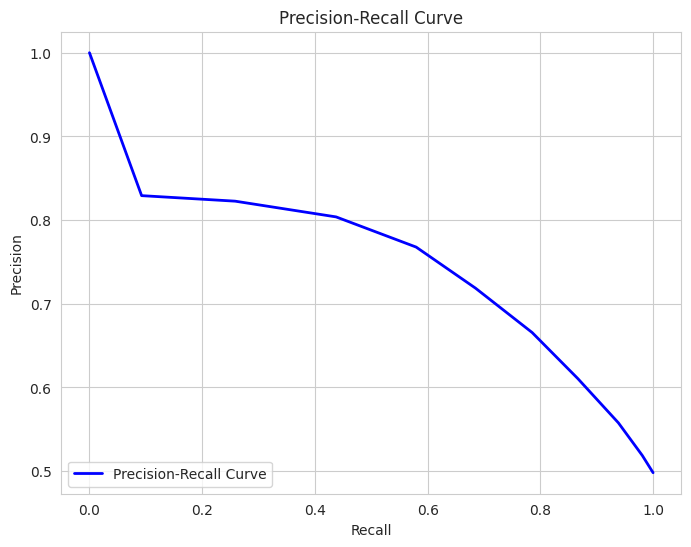

In [ ]:
# Plot Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

In [ ]:
# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Precision: 0.7186
Recall: 0.6850
F1-score: 0.7014


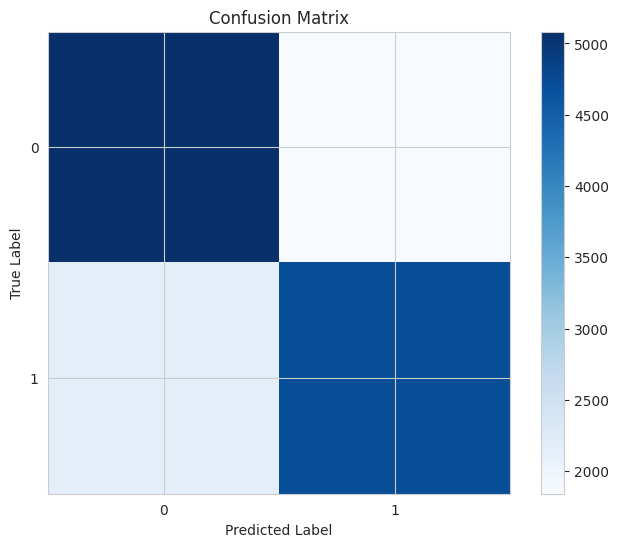

In [ ]:
# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks([0, 1])
plt.yticks([0, 1])
plt.show()

## **Logistic Regression Analysis**

In [ ]:
# Preprocessing
X = data.drop(columns=['id', 'cardio'])
y = data['cardio']


In [ ]:
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Feature scaling (important for Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Initialize Logistic Regression classifier
log_reg = LogisticRegression(max_iter=1000)

In [ ]:
# Define hyperparameters to tune
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2']  # Regularization penalty (L1 or L2)
}

In [ ]:
# Grid search to find the best hyperparameters
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [ ]:
# Get the best model
best_log_reg = grid_search.best_estimator_

In [ ]:
# Evaluate the best model on test data
y_pred = best_log_reg.predict(X_test_scaled)

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.73


In [ ]:
# Display classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.71      0.78      0.74      6925
           1       0.76      0.67      0.71      6872

    accuracy                           0.73     13797
   macro avg       0.73      0.73      0.73     13797
weighted avg       0.73      0.73      0.73     13797



## **complete Analysis for Logistic Regression**

([<matplotlib.axis.YTick at 0x7fce206b9450>,
 [Text(0, 0, '0'), Text(0, 1, '1')])

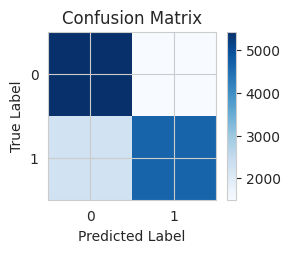

In [ ]:
# Plot confusion matrix
plt.subplot(2, 2, 1)
conf_matrix = confusion_matrix(y_test, y_pred)
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks([0, 1])
plt.yticks([0, 1])


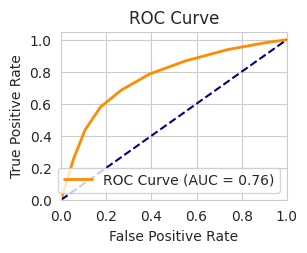

In [ ]:
# Plot ROC curve
plt.subplot(2, 2, 2)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")

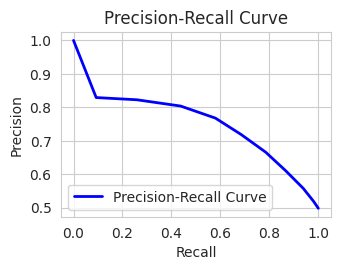

In [ ]:
# Plot Precision-Recall curve
plt.subplot(2, 2, 3)
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")

plt.tight_layout()
plt.show()

# **Random forest Analysis**

In [ ]:
# Preprocessing
X = data.drop(columns=['id', 'cardio'])
y = data['cardio']

In [ ]:
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize Random Forest classifier
rf = RandomForestClassifier(random_state=42)

In [ ]:
# Define hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10]  # Minimum number of samples required to split a node
}

In [ ]:
# Grid search to find the best hyperparameters
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [ ]:
# Get the best model
best_rf = grid_search.best_estimator_

In [ ]:
# Evaluate the best model on test data
y_pred = best_rf.predict(X_test)
y_pred_proba = best_rf.predict_proba(X_test)[:, 1]
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.74


## **complete Analysis for Random Forest**

In [ ]:
# Display classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.78      0.75      6925
           1       0.76      0.69      0.72      6872

    accuracy                           0.74     13797
   macro avg       0.74      0.74      0.74     13797
weighted avg       0.74      0.74      0.74     13797



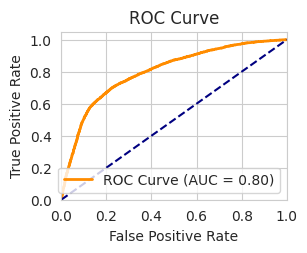

In [ ]:
# Plot ROC curve
plt.subplot(2, 2, 2)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")

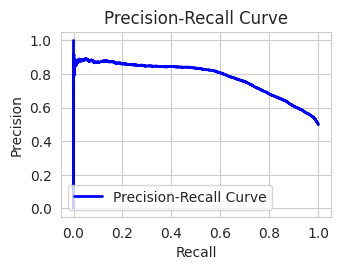

In [ ]:
# Plot Precision-Recall curve
plt.subplot(2, 2, 3)
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")

plt.tight_layout()
plt.show()

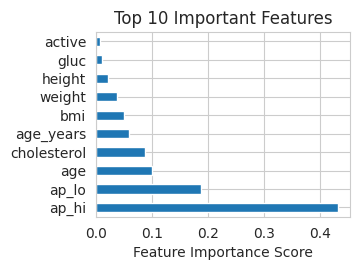

Cross-Validation Scores: [0.730956   0.74037834 0.73378271 0.73443502 0.73117344]
Mean Cross-Validation Score: 0.7341


In [ ]:
# Feature Importance Plot
plt.subplot(2, 2, 4)
feature_importance = pd.Series(best_rf.feature_importances_, index=X.columns)
feature_importance.nlargest(10).plot(kind='barh')
plt.title('Top 10 Important Features')
plt.xlabel('Feature Importance Score')

plt.tight_layout()
plt.show()

# Cross-validation for more robust evaluation
cv_scores = cross_val_score(best_rf, X, y, cv=5)
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Cross-Validation Score: {cv_scores.mean():.4f}")

## **SVM Analysis**

In [ ]:
# Data preprocessing
# Convert age from days to years
data['age'] = (data['age'] / 365).astype(int)

In [ ]:
# Separate features (X) and target (y)
X = data.drop(columns=['age', 'cardio'])
y = data['cardio']

In [ ]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Feature Selection using SelectFromModel (based on SVM weights)
svm_selector = SelectFromModel(SVC(kernel='linear', random_state=42))
X_train_selected = svm_selector.fit_transform(X_train_scaled, y_train)
X_test_selected = svm_selector.transform(X_test_scaled)

In [ ]:
# Use SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_selected, y_train)


In [ ]:
# Initialize SVM classifier with optimized hyperparameters
svm_classifier = SVC(C=10, gamma=0.1, kernel='rbf', random_state=42, probability=True)

In [ ]:
# Use AdaBoost for ensemble learning
ada_classifier = AdaBoostClassifier(base_estimator=svm_classifier, n_estimators=50, random_state=42)

In [ ]:
# Fit the SVM classifier on the balanced training data
svm_classifier.fit(X_train_balanced, y_train_balanced)

SVC(C=10, gamma=0.1, probability=True, random_state=42)

In [ ]:
# Predict probabilities on the test data
y_prob = svm_classifier.predict_proba(X_test_selected)[:, 1]

In [ ]:
# Convert probabilities to binary predictions (0 or 1)
y_pred = np.where(y_prob >= 0.5, 1, 0)

In [ ]:
# Feature Importance Plot (from SelectFromModel)
selected_features = X.columns[svm_selector.get_support()]
feature_importances = np.abs(svm_selector.estimator_.coef_).flatten()

In [ ]:
importance_df = pd.DataFrame(list(zip(selected_features, feature_importances)), columns=['Feature', 'Importance'])
importance_df = importance_df.sort_values(by='Importance', ascending=False)

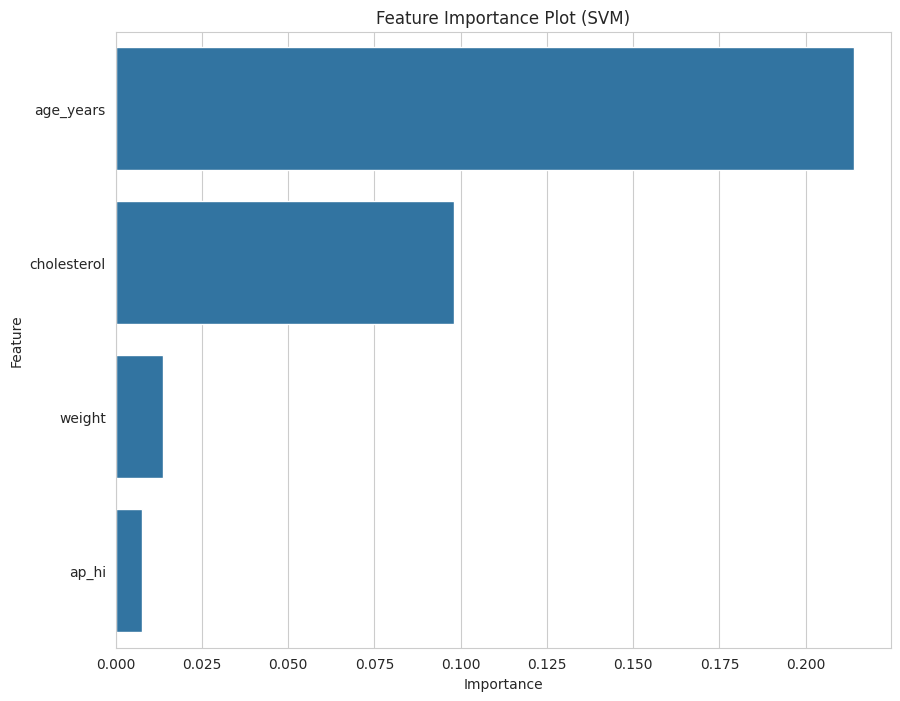

In [ ]:
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance Plot (SVM)')
plt.show()

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Advanced SVM Model: {accuracy:.4f}")

Accuracy of Advanced SVM Model: 0.7312


# **Machine Learning Model Usign User Input **

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Sample data provided
data = pd.read_csv("cardio_train.csv", delimiter=';')
# Drop any rows with missing values
data.dropna(inplace=True)
# Creating DataFrame
df = pd.DataFrame(data)

# Feature selection
features = ['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']

# Defining X and y
X = df[features]
y = df['cardio']

# Standardizing features with feature names
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Creating logistic regression model
model = LogisticRegression()

# Training the model
model.fit(X_scaled, y)

# Ask user for input
age = int(input("Enter age in days: "))
gender = int(input("Enter gender (1 for female, 2 for male): "))
height = int(input("Enter height in cm: "))
weight = int(input("Enter weight in kg: "))
ap_hi = int(input("Enter systolic blood pressure: "))
ap_lo = int(input("Enter diastolic blood pressure: "))
cholesterol = int(input("Enter cholesterol level (1: normal, 2: above normal, 3: well above normal): "))
gluc = int(input("Enter glucose level (1: normal, 2: above normal, 3: well above normal): "))
smoke = int(input("Do you smoke? (0 for no, 1 for yes): "))
alco = int(input("Do you consume alcohol? (0 for no, 1 for yes): "))
active = int(input("Are you physically active? (0 for no, 1 for yes): "))

# Predicting with user input
user_data = np.array([[age, gender, height, weight, ap_hi, ap_lo, cholesterol, gluc, smoke, alco, active]])
user_data_scaled = scaler.transform(user_data)
prediction = model.predict(user_data_scaled)

# Print prediction
if prediction[0] == 1:
    print("You are predicted to have cardiovascular disease.")
else:
    print("You are predicted to not have cardiovascular disease.")



Enter age in days: 7300
Enter gender (1 for female, 2 for male): 2
Enter height in cm: 179
Enter weight in kg: 85
Enter systolic blood pressure: 120
Enter diastolic blood pressure: 80
Enter cholesterol level (1: normal, 2: above normal, 3: well above normal): 2
Enter glucose level (1: normal, 2: above normal, 3: well above normal): 1
Do you smoke? (0 for no, 1 for yes): 0
Do you consume alcohol? (0 for no, 1 for yes): 0
Are you physically active? (0 for no, 1 for yes): 0
You are predicted to not have cardiovascular disease.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
